# Лекция 5. QR разложение и поиск собственных векторов и значений

## В прошлый раз

- Ранг матрицы
- Скелетное разложение
- SVD
- Оптимальность поиска малоранговой аппроксимации через SVD

## План на сегодня

- QR разложение и методы его вычисления
- Собственные векторы и их приложения (PageRank)
- Круги Гершгорина
- Степенной метод вычисления собственных векторов и значений
- Теорема Шура
- Нормальные матрицы

## Общая концепция матричных разложений

Вычислительная линейная алгебра занимается решением следующих задач:

- Решение линейных систем $Ax = f$
- Вычисление собственных значений и векторов
- Вычисление сингулярных значений и векторов 
- Вычисление обратных матриц и иногда детерминантов
- Вычисление **матричных функций** таких как $\exp(A), \cos(A)$ (это не поэлементные функции!)

Для решения таких задач мы представляемм матрицу в виде суммы и/или произведения матриц **более простой структуры**, таких что мы можем решить эти задачи быстрее и/или более устойчивым образом.

Что такое **более простая структура**?

## Матрицы простой структуры

Мы уже упоминали некоторые классы структурированных матриц. 

Для плотных матриц это следующие матрицы

- **унитарные матрицы**
- **нижне- верхнетреугольные матрицы** 
- **диагональные матрицы**

## PLU разложение

Любая невырожденная матрица может быть разложена как

$$
A = P L U,
$$

где $P$ – матрица перестановки, $L$ – **нижнетреугольная матрица**, $U$ – **верхнетреугольная матрица**.

**Основная цель** вычисления LU разложения – это решение систем линейных уравнений, потому что

$$
    A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, 
$$

что сводится к решению двух линейных систем 

$$
     L y = f,  \quad U x = y
$$

с нижне- и верхнетреугольной матрицей, соответственно. 

## Положительно определённые матрицы и разложение Холецкого

Если матрица эрмитова и положительно определена, то есть

$$
A = A^*, \quad (Ax, x) > 0, \quad x \ne 0,
$$

тогда она может быть представлена в виде

$$
A = RR^*,
$$

где $R$ – нижнетреугольная матрица.

Это нам понадобится для QR разложения.

## QR разложение

Как следует из названия, это представление матрицы в виде произведения

$$
    A = Q R, 
$$

где $Q$ – матрица с **ортогональными столбцами** и $R$ – **верхнетреугольная**.  

Размеры матриц: $Q$ – $n \times m$, $R$ – $m \times m$, если $n\geq m$.

QR разложение определено для любой **прямоугольной матрицы**.

## Приложения QR разложения

Это разложение играет ключевую роль при решении многих задач, например:
- Получение ортогонального базиса в линейном пространстве
- Используется для препроцессинга при вычислении SVD
- QR алгоритм для вычисления собственных векторов и собственных значений ([один из 10 самых важных алгоритмов ХХ века](https://archive.siam.org/pdf/news/637.pdf)) основан на вычислении QR разложения
- Решение переопределённых систем линейных уравнений

## QR разложение и линейная задача наименьших квадратов: напоминание

Пусть нам надо решить переопределённую систему $Ax = f$ в смысле наименьших квадратов невязок  

$$
\Vert A x - f \Vert_2 \rightarrow \min_x,
$$

где $A$ – $n \times m$ и $n \geq m$.

Тогда мы разложим её 

$$
A = Q R,
$$

и используем выражение для псевдообратной матрицы в случае матрицы полного ранга:

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$

тогда $x$ может быть найдён из решения следующей системы

$$R x = Q^*b$$

Заметим, что это квадратная система линейных уравнений с верхнетреугольной матрицей. Какова сложность решения такой системы?

## Существование QR разложения

**Теорема.**

Каждая матрица $n \times m$ может быть представлена в виде QR разложения. 


Существует несколько способов доказательства и вычисления:

- Теоретический: используя матрицу Грама и разложение Холецкого
- Геометрический: используя ортогонализацию Грама-Шмидта
- Практический: используя преобразования Гивенса/Хаусхолдера

### Доказательство с использованием разложения Холецкого

Если у нас есть разложение

$$A = QR,$$

тогда $A^* A = ( Q R)^* (QR)  = R^* (Q^* Q) R = R^* R$, матрица $A^* A$ называется **матрицей Грама**, и её элементы – скалярные произведения столбцов матрицы $A$.  

### Случай матрицы полного ранга

Пусть $A$ имеет **полный столбцовый ранг**. Тогда легко показать, что $A^* A$ положительно определена:

$$
   (A^* A y, y) = (Ay, Ay) = \Vert Ay \Vert^2_2  > 0, \quad y\not = 0.
$$

Поэтому, $A^* A = R^* R$ всегда существует.

Тогда матрица $A R^{-1}$ унитарна:  

$$
   (A R^{-1})^* (AR^{-1})= R^{-*} A^* A R^{-1} = R^{-*} R^* R R^{-1} = I.
$$


### Случай матрицы неполного ранга

- QR разложение по-прежнему существует.

- Для любой матрицы неполного ранга существует последовательность матриц полного ранга $A_k$ такая что $A_k \rightarrow A$ (почему?).

- Каждая $A_k$ может быть разложена $A_k = Q_k R_k$. 

- Множество унитарных матриц образует компакт, таким образом найдётся сходящаяся подпоследовательность $Q_{n_k} \rightarrow Q$ (почему?), и $Q^* A_k \rightarrow Q^* A = R$, которая верхнетреугольная.

## Устойчивость вычисления QR разложения с помощью разложения Холецкого 

Итак, простейший способ вычисления QR разложения следующий

$$A^* A = R^* R,$$

и

$$Q = A R^{-1}.$$

Это **плохая идея** с точки зрения устойчивости. Покажем, почему это так.

In [11]:
import numpy as np
n = 50
r = 8
a = [[1.0 / (i + j + 0.5) for i in range(r)] for j in range(n)]
a = np.array(a)
print(a.shape)
q, Rmat = np.linalg.qr(a)
e = np.eye(r)
print('Built-in QR orth', np.linalg.norm(np.dot(q.T, q) - e))
gram_matrix = a.T.dot(a)
Rmat1 = np.linalg.cholesky(gram_matrix)
q1 = np.dot(a, np.linalg.inv(Rmat1.T))
print('Via Cholesky:', np.linalg.norm(np.dot(q1.T, q1) - e))

(50, 8)
Built-in QR orth 1.924152493674034e-15
Via Cholesky: 0.04587925317113147


## Второй способ: ортогонализация Грама-Шмидта

- QR разложение – это способ записи процесса ортогонализации Грама-Шмидта
- Для данного набора векторов $a_1, \ldots, a_m$ мы хотим найти ортонормированный базис $q_1, \ldots, q_m$ такой чтобы каждый вектор $a_i$ представлялся как линейная комбинация векторов из базиса.  

**Метод Грама-Шмидта:**
1. $q_1 := a_1/\Vert a_1 \Vert$
2. $q_2 := a_2 - (a_2, q_1) q_1, \quad q_2 := q_2/\Vert q_2 \Vert$
3. $q_3 := a_3 - (a_3, q_1) q_1 - (a_3, q_2) q_2, \quad q_3 := q_3/\Vert q_3 \Vert$
4. И так далее  

Заметим, что преобразование из $A$ в $Q$ имеет треугольную структуру, поскольку мы вычитаем из $k$-го вектора только предыдущие. Это следует из того, что произведение треугольных матриц – это треугольная матрица.

## Модифицированный метод Грама-Шмидта

- Метод Грама-Шмидта может быть очень неустойчивым (то есть генерировать векторы, которая не являются ортогональными, особенно если $q_k$ малой нормы).  
Это называется **потеря ортогональности**.  

- Этот недостаток метода Грама-Шмидта исправляется с помощью **модифицированного метода Грама-Шмидта**. Вместо вычисления

$$q_k := a_k - (a_k, q_1) q_1 - \ldots - (a_k, q_{k-1}) q_{k-1}$$

мы будем вычислять это выражение шаг за шагом. Сначала присвоим $q_k := a_k$, затем последовательно ортогонализуем:

$$
   q_k := q_k - (q_k, q_1)q_1, \quad q_k := q_{k} - (q_k,q_2)q_2, \ldots
$$

- В точной арифметике, это одинаковые алгоритмы. В неточной арифметике они абсолютно разные!

- Заметим, что сложность по-прежнему $\mathcal{O}(nm^2)$ операций

In [29]:
import numpy as np

n = 50
r = 8
a = [[1.0 / (i + j + 0.5) for i in range(r)] for j in range(n)]
A = np.array(a)

def gramm_schmidt(A):
    Q = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))
    n = A.shape[1]
    for i in range(A.shape[1]):
        Q[:, i] = A[:, i].copy()
        for j in range(i):
            R[j, i] = Q[:, i] @ Q[:, j]
        for j in range(i):
            Q[:, i] -= R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] /= np.linalg.norm(Q[:, i])
    return Q, R

Q, R = gramm_schmidt(A)
print(np.linalg.norm(Q.T @ Q - np.eye(r)))
print(np.linalg.norm(A - Q @ R))

def modified_gramm_schmidt(A):
    Q = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))
    n = A.shape[1]
    for i in range(A.shape[1]):
        Q[:, i] = A[:, i].copy()
        for j in range(i):
            R[j, i] = Q[:, i] @ Q[:, j]
            Q[:, i] -= Q[:, i] @ Q[:, j] * Q[:, j]
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] /= np.linalg.norm(Q[:, i])
    return Q, R

Q, R = modified_gramm_schmidt(A)
print(np.linalg.norm(Q.T @ Q - np.eye(r)))
print(np.linalg.norm(A - Q @ R))

0.1728828047902182
1.5936813088446094e-16
1.2696433159012304e-09
1.658816568534105e-16


## QR разложение: почти практический способ

Если $A = QR$, тогда  

$$
R = Q^* A,
$$

и нам нужно найти такую ортогональную матрицу $Q$, которая преобразует данную матрицу $A$ в верхнетреугольную.  
Для простоты мы будем смотреть на матрицы $n \times n$ такие что

$$ Q^* A = \begin{bmatrix} * & * & *  \\ 0 & * & * \\ 0 & 0 & * \\ & 0_{(n-m) \times m} \end{bmatrix} $$

Будем приводить матрицу к такому виду столбец за столбцом.

Сначала найдём такую матрицу Хаусхолдера $H_1 = (I - 2 uu^{\top})$ что 

$$ H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \end{bmatrix} $$

Затем

$$ H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \end{bmatrix}, $$

где

$$ H_2 = \begin{bmatrix} 1 & 0 \\ 0 & H'_2, \end{bmatrix} $$

и $H'_2$ матрица Хаусхолдера $3 \times 3$.

И наконец, 

$$ H_3 H_2 H_1 A = \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \end{bmatrix}, $$

где $H_3=\begin{bmatrix}I_2 & \\ & {\widetilde H}_3 \end{bmatrix}$ такая что

$$ 
{\widetilde H}_3 \begin{bmatrix} \boldsymbol{\times}\\ \boldsymbol{\times} \\ \boldsymbol{\times}  \end{bmatrix} = 
\begin{bmatrix} \times \\ 0 \\ 0  \end{bmatrix}.
$$

Попробуйте самостоятельно реализовать такой алгоритм, это просто!

### Получение QR разложения

Так как 

$$ H_3H_2H_1A = HA = R,$$

где $H$ – унитарная матрица, то

$$ A = H^*R. $$

Таким образом $Q = H^*$.

## QR разложение: практический способ

- Поскольку мы работаем с плотной матрицей, то на практике нам нужен алгоритм, оперирующий блоками (почему?).  

- Вместо использования преобразования Хаусхолдера, мы будем использовать **блочное преобразование Хаусхолдера** вида 

$$H = (I - 2UU^*), $$

где $U^* U = I$.

- Это позволяет использовать BLAS-3 операции - про это будет далее в курсе

## QR разложение: практический способ - 2

Аналогично преобразованию Хаусхолдера для вычисления QR разложения можно использовать преобразование Гивенса

$$\begin{bmatrix} \times & \times & \times \\ \bf{*} & \times & \times \\ \bf{*} & \times & \times \end{bmatrix} \to \begin{bmatrix} * & \times & \times \\ * & \times & \times \\ 0 & \times & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & * & \times \\ 0 & * & \times \end{bmatrix} \to \begin{bmatrix} \times & \times & \times \\ 0 & \times & \times \\ 0 & 0 & \times \end{bmatrix} $$

## Преобразование Гивенса vs. преобразование Хаусхолдера

- Матрицы Хаусхолдера полезны для плотных матриц (сложность примерно в два раза меньше), в которых необходимо занулить большое число элементов за одно отражение.
- Вращения Гивенса больше подходят для работы с разреженными матрицами или параллельными вычислениями, поскольку они зануляют только один элемент каждым действием.

## QR разложение: итоги

- Существует для любой матрицы
- Геометрически означает ортогонализацию векторов
- Эффективные алгоритмы основаны на BLAS-3 операциях

## Собственные векторы и связанные с ними разложения

## Что такое собственный вектор?

**Определение.** Вектор $x \ne 0$ называется **собственным** для квадратной матрицы $A$, если найдётся такое число $\lambda$ что

$$
   Ax = \lambda x.
$$

Число $\lambda$ называется **собственным значением**.

Так как матрица $A - \lambda I$ должна иметь нетривиальное ядро (что такое ядро?), 
собственные значения являются корнями характеристического полинома

$$ \det (A - \lambda I) = 0.$$

## Разложение по собственным векторам (eigendecomposition)

Если матрица  $A$ размера $n\times n$ имеет $n$ собственных векторов $s_i$, $i=1,\dots,n$:

$$ As_i = \lambda_i s_i, $$

то это может быть записано в виде

$$ A S = S \Lambda, \quad\text{где}\quad S=(s_1,\dots,s_n), \quad \Lambda = \text{diag}(\lambda_1, \dots, \lambda_n),$$

или эквивалентно

$$ A = S\Lambda S^{-1}. $$

Такая форма представления матрицы $A$ называется разложением по собственным векторам (**eigendecomposition**). Матрицы, которые могут быть представлены в таком виде, называются **диагонализуемыми**.

#### Существование

Какие матрицы являются диагонализуемыми?

Простым примером являются матрицы, у которых все собственные значения различны.
Более общий факт звучит так: 

матрица диагонализуема тогда и только тогда, когда **алгебраическая кратность** каждого собственного значения (кратность корня характеристического многочлена) совпадает с его **геометрической кратностью** (размерностью собственного подпространства). 

Для наших целей наиболее важный класс диагонализуемых матриц – это класс **нормальных матриц**: 

$$AA^* = A^* A.$$

Почему такие матрицы диагонализуемы станет ясно чуть позже.

#### Пример

* Легко проверить, что матрица 

$$A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}$$ 

имеет одно собственное значение  $1$ кратности $2$ (поскольку характеристический многочлен имеет вид $p(\lambda)=(1-\lambda)^2$), но только один собственный вектор  $\begin{pmatrix} c \\ 0  \end{pmatrix}$ и следовательно такая матрица недиагонализуема.

## Почему важны собственные векторы и собственные значения?

- Собственные векторы имеют как важное теоретическое значения, так и многочисленные приложения.
- Весь микромир подчиняется законам следующим из **уравнения Шрёдингера**, которое является задачей на поиск собственного вектора и собственного значения:

$$
    H \psi = E \psi,
$$

где $E$ – нижний уровень энергии, $\psi$ – волновая функция и $H$ – гамильтониан.  
- Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач дизайна материалов и разработки новых лекарств 

## Google PageRank

Одна из самых известных задач, сводящихся к вычислению собственного вектора, – это задача вычисления **Google PageRank**. 

- Задача состоит в ранжировании веб-страниц: какие из них являются важными, а какие нет
- В интернете страницы ссылаются друг на друга
- PageRank определяется рекурсивно. Обозначим за $p_i$ **важность** $i$-ой страницы. Тогда определим эту важность как усреднённую важность всех страниц, которые ссылаются на данную страницу. Это определение приводит к следующей линейной системе

$$ p_i = \sum_{j \in N(i)} \frac{p_j}{L(j)}, $$

где $L(j)$ – число исходящих ссылок с $j$-ой страницы, $N(i)$ – число соседей $i$-ой страницы. Это может быть записано следующим образом

$$ p = G p, \quad G_{ij} = \frac{1}{L(j)} $$

или как задача на собственные значения

$$
   Gp = 1 p,
$$

то есть мы уже знаем, что у матрицы $G$ есть собственное значение равное $1$. 
Заметим, что $G$ – **левостохастичная** матрица, то есть сумма элементов в каждом столбце равна $1$. 
Проверьте, что любая левостохастичная матрица имеет собственное значение равное $1$.

## Демо

Мы можем вычислить PageRank с помощью библиотек на Python. 
Будем использовать бибилотеку ```networkx``` для работы с графами, она может быть установлена с помощью следующей команды

```conda install networkx```

- Возьмём простой пример графа [Zachary karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 
- Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.

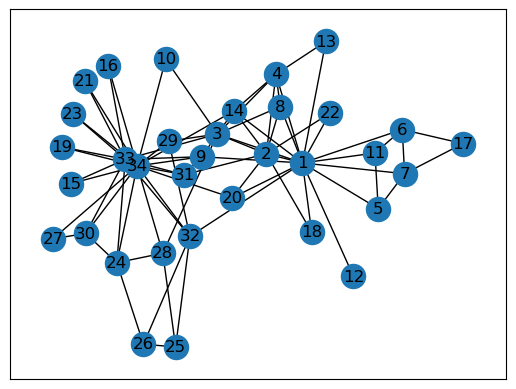

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('karate.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

- Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. 
- Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

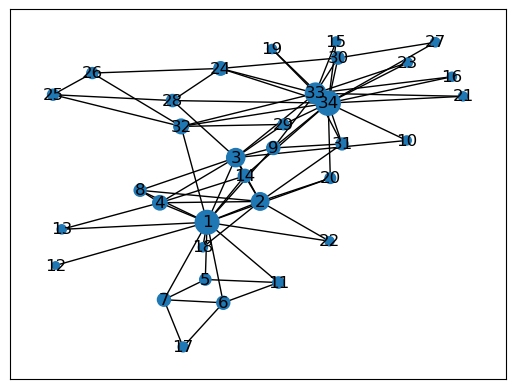

In [2]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

## Вычисление собственных значений

- Как вычислить собственные значения и собственные векторы? 

Все задачи на собственные значения делятся на два класса:

- полная задача на собственные значения (нужны все собственные значения и собственные векторы)
- частичная задача на собственные значения (требуются минимальное/максимальное собственное значение, или собственные значения из заданного промежутка)

## Вычисление собственных значений с помощью характеристического многочлена

Задача на собственные значения имеет вид

$$ Ax = \lambda x, $$

или

$$ (A - \lambda I) x = 0,$$

поэтому матрица $A - \lambda I$ имеет нетривиальное ядро и должна быть вырожденной. Это значит, что её **детерминант** равен нулю: 

$$ p(\lambda) = \det(A - \lambda I) = 0. $$

- Это уравнение называется **характеристическим** и является полиномом степени $n$. 
- Многочлен степени $n$ имеет $n$ комплексных корней!

## Вспомним, что такое детерминант

Детерминант квадратной матрицы определён как

$$\det A = \sum_{\sigma \in S_n} \mathrm{sgn}({\sigma})\prod^n_{i=1} a_{i, \sigma_i},$$

где 
- $S_n$ множество всех **перестановок** чисел $1, \ldots, n$
- $\mathrm{sgn}$ обозначает **знак** перестановки ( $(-1)^p$, где $p$ – число требуемых транспозиций).

## Свойства детерминанта

Детерминант обладает многими полезными свойствами:

1. $\det(AB) = \det(A) \det(B)$
2. Разложение по минорам: мы можем вычислить детерминант с помощью процедуры разложения по выбранной строке или столбцу. В этом случае сложность вычисления будет экспоненциальна по $n$.

Можно ли вычислить детерминант за $\mathcal{O}(n^3)$? 

## Собственные значения и характеристическое уравнение

Вернёмся к собственным значениям.

Характеристическое уравнение можно использовать для вычисления собственных значений, что приводит нас к наивному алгоритму:

$$p(\lambda) = \det(A - \lambda I)$$

1. Вычислить коэффициенты многочлена
2. Найти его корни

**Это хорошая идея?**  

Посмотрим на небольшой пример

3.1754389391464586


Text(0, 0.5, 'Imaginary part')

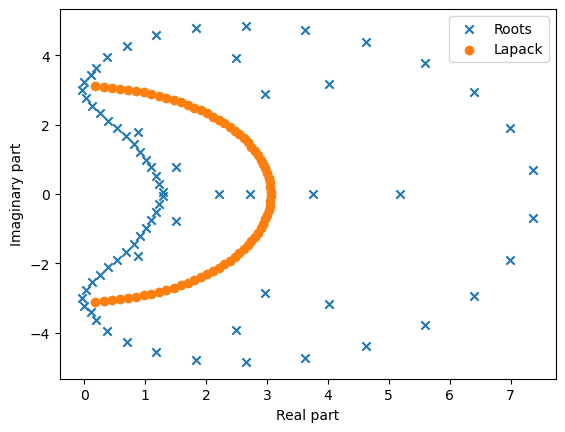

In [23]:
import numpy as np
n = 70
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
print(np.linalg.cond(a))
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='Roots')
b = a + 0 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

**Мораль**: 

- Не делайте так, если только у вас нет серьёзной причины
- Поиск корней полинома – очень **плохо обусловленная** задача (задача может быть обусловлена не так плохо, но с использованием другого базиса в пространстве многочленов). Заметим, что матрицей Грама для мономов

$$h_{ij} = \int_0^1 x^i x^j\, dx = \frac{1}{i+j+1},$$

является матрица Гильберта, у которой сингулярные числа экспоненциально убывают. Таким образом, мономы почти линейно зависимы.

## Круги Гершгорина

- Есть интересная теорема, которая часто помогает локализовать собственные значения. 

- Она называется **теоремой Гершгорина**.  

- Она утверждает, что все собственные значения $\lambda_i,  i = 1, \ldots, n$ находятся внутри объединения **кругов Гершгорина** $C_i$, где $C_i$ – окружность на комплексной плоскости с центром в $a_{ii}$ и радиусом

$$r_i = \sum_{j \ne i} |a_{ij}|.$$

Более того, если круги не пересекаются, то они содержат по одному собственному значению внутри каждого круга.

## Доказательство 

Сначала покажем, что если матрица $A$ обладает строгим диагональным преобладанием, то есть 

$$ |a_{ii}| > \sum_{j \ne i} |a_{ij}|, $$

тогда такая матрица невырождена.

Разделим диагональную и недиагональную часть и получим

$$
    A = D + S = D( I + D^{-1}S),
$$

где $\Vert D^{-1} S\Vert_1 < 1$. 
Поэтому, в силу теоремы о ряде Неймана, матрица $I + D^{-1}S$ обратима и, следовательно, $A$ также обратима.

Теперь докажем утверждение теоремы от противного: 

- если любое из собственных чисел лежит вне всех кругов, то матрица $(A - \lambda I)$ обладает свойством строгого диагонального преобладания
- поэтому она обратима
- это означает, что если $(A - \lambda I) x = 0$, то $x = 0$. 

## Демо

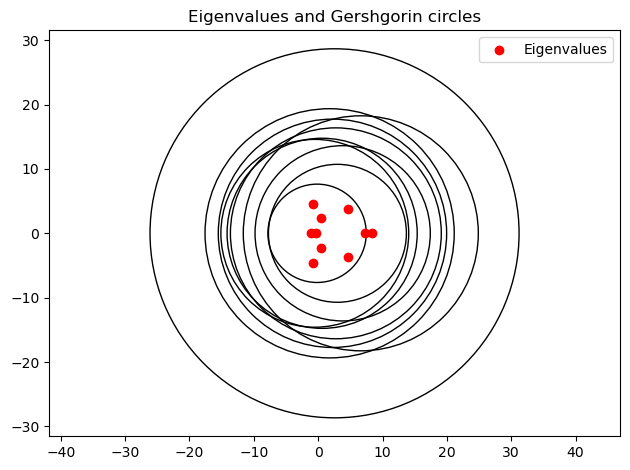

In [29]:
import numpy as np
%matplotlib inline
n = 10
fig, ax = plt.subplots(1, 1)
# a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a + 2 * np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

**Замечание**: Существуют более сложные фигуры, под названием **[овалы Cassini](https://en.wikipedia.org/wiki/Cassini_oval)**, которые содержат спектр

$$
    M_{ij} = \{z\in\mathbb{C}: |a_{ii} - z|\cdot |a_{jj} - z|\leq r_i r_j\}, \quad r_i = \sum_{l\not= i} |a_{il}|.
$$

## Степенной метод

- Часто в вычислительной практике требуется найти не весь спектр, а только некоторую его часть, например самое большое или самое маленькое собственные значения. 
- Также отметим, что для Эрмитовых матриц $(A = A^*)$ собственные значения всегда действительны (докажите!).
- Степенной метод – простейший метод вычисления **максимального по модулю** собственного значения. Это также первый пример **итерационного метода** и **Крыловского метода**.
-  Другие примеры будут далее в курсе

## Степенной метод: детали

Задача на собственные значения

$$Ax = \lambda x, \quad \Vert x \Vert_2 = 1 \ \text{для устойчивости}.$$ 

может быть записана как итерации с неподвижной точкой, которые называются **степенным методом** и дают максимальное по модулю собственное значение матрицы $A$.

Степенной метод имеет вид

$$ x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}.$$

и $x_{k+1}\to v_1$, где $Av_1 = \lambda_1 v_1$ и $\lambda_1$ максимальное по модулю собственное значение, и $v_1$ – соответствующий собственный вектор.

На $(k+1)$-ой итерации приближение для $\lambda_1$ может быть найдено следующим образом

$$ \lambda^{(k+1)} = (Ax_{k+1}, x_{k+1}). $$

Заметим, что $\lambda^{(k+1)}$ не требуется для $(k+2)$-ой итерации, но может быть полезно для оценки ошибки на каждой итерации: $\|Ax_{k+1} - \lambda^{(k+1)}x_{k+1}\|$. 

Метод сходится со скоростью геометричекой прогрессии, с константой $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$, где $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$. 
Это означает, что сходимость может быть сколь угодно медленной при близких значениях у $\lambda_1$ и $\lambda_2$.

## Анализ сходимости для $A=A^*$

- Рассмотрим степенной метод более подробно для случая эрмитовой матрицы 
- Через несколько слайдов вы увидите, что любая эрмитова матрица диагонализуема, поэтому существует ортонормированный базис из собственных векторов $v_1,\dots,v_n$ такой что $Av_i = \lambda_i v_i$. 
- Разложим $x_0$ в этом базисе с коэффициентами $c_i$:

$$ x_0 = c_1 v_1 + \dots + c_n v_n. $$

- Поскольку $v_i$ – собственные векторы, выполнены следующие равенства

$$
\begin{split}
x_1 &= \frac{Ax_0}{\|Ax_0\|} = \frac{c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n}{\|c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n \|}  \\
&\vdots\\
x_k &= \frac{Ax_{k-1}}{\|Ax_{k-1}\|} = \frac{c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n}{\|c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n \|}
\end{split}
$$

- Получаем следующее выражение 

$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n}{\left\|v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n\right\|},
$$

которое сходится к $v_1$ при $\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1$ и $\left(\frac{\lambda_2}{\lambda_1}\right)^k \to 0$ если $|\lambda_2|<|\lambda_1|$.

## Что необходимо помнить о степенном методе

- Степенной метод даёт оценку для максимального по модулю собственного числа или спектрального радиуса матрицы
- Одна итерация требует одного умножения матрицы на вектор. Если можно умножить вектор на матрицу за $\mathcal{O}(n)$ (например, она разреженная), тогда степенной метод можно использовать для больших $n$
- Сходимость может быть медленной
- Для грубой оценки максимального по модулю собственного значения и соответствующего вектора достаточно небольшого числа итераций
- Вектор решения лежит в **Крыловском подпространстве** $\{x_0, Ax_0,\dots,A^{k}x_0\}$ и имеет вид $\mu A^k x_0$, где $\mu$ нормировочная постоянная. 


## А как найти весь спектр?

**Используем матричное разложение!**

##  Для какой матрицы легко найти весь спектр?

Существует класс матриц, для которого собственные числа можно найти очень легко, – это **треугольные матрицы**

$$
  A = \begin{pmatrix}
   \lambda_1 & * & * \\
   0 & \lambda_2 & * \\
   0 & 0 & \lambda_3 \\
  \end{pmatrix}.
$$

Собственные числа матрицы $A$ – $\lambda_1, \lambda_2, \lambda_3$. Почему? 

Потому что детерминант имеет вид 

$$ \det(A - \lambda I) = (\lambda - \lambda_1) (\lambda - \lambda_2) (\lambda - \lambda_3). $$

Таким образом, вычисление собственных значений для треугольной матрицы – простая задача. Теперь на помощь приходят унитарные матрицы. Пусть $U$ унитарная матрица, то есть $U^* U = I$.  Тогда выполнены следующие равенства

$$ \det(A - \lambda I) = \det(U (U^* A U - \lambda I) U^*) = \det(UU^*) \det(U^* A U - \lambda I) = \det(U^* A U - \lambda I), $$

где мы используем свойства детерминанта от произведения матриц, $\det(AB) = \det(A) \det(B)$. 
Это означает, что матрицы $U^* A U$ и $A$ имеют одинаковые характеристические многочлены, и, следовательно, одинаковые собственные значения. 

Если мы приведём матрицу $A$ к верхнетреугольному виду $T$ с помощью унитарной матрицы $U$: $U^* A U = T$, мы решили задачу! 
Умножим слева и справа на $U$ и $U^*$ соответственно, получим нужное нам разложение:  

$$ A = U T U^*. $$

- Это знаменитое **разложение Шура**. 
- Напомним, что использование унитарных матриц приводит к устойчивым алгоритмам, таким образом собственные значения вычисляются очень точно. 
- Разложение Шура показывает, почему нам нужны матричные разложения: они представляют матрицу в виде произведения трёх матриц подходящей структуры.  

## Теорема Шура

**Теорема:** Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в виде формы Шура $A = UTU^*$, где $U$ унитарная, а $T$ верхнетреугольная.

**Набросок доказательства**.
1. Каждая матрица имеет как минимум один ненулевой собственный вектор (для корня характеристического многочлена матрица $(A-\lambda I)$ вырождена и имеет нетривиальное ядро). Пусть 

$$Av_1 = \lambda_1 v_1, \quad \Vert v_1 \Vert_2 = 1.$$

2. Пусть $U_1 = [v_1,v_2,\dots,v_n]$, где $v_2,\dots, v_n$ любые векторы ортогональные $v_1$. Тогда 
  
  $$
      U^*_1 A U_1 = \begin{pmatrix}
      \lambda_1 & *  \\
      0 & A_2 
      \end{pmatrix},
  $$
  
  где $A_2$ матрица размера $(n-1) \times (n-1)$. Это называется **блочнотреугольной формой**. Теперь мы можем проделать аналогичную процедуру для матрицы $A_2$ и так далее.  
  
  
**Замечание**: Поскольку в доказательстве необходимы собственные векторы, оно не является практичным алгоритмом.

## Приложение теоремы Шура

Важное приложение теоремы Шура связано с так называемыми **нормальными матрицами**.  

**Определение.** Матрица $A$ называется **нормальной матрицей**, если  

$$ AA^* = A^* A. $$

**Q:** Какие примеры нормальных матриц вы можете привести?

Примеры: эрмитовы матрицы, унитарные матрицы.

## Нормальные матрицы

**Теорема**: $A$ – **нормальная матрица**, тогда и только тогда, когда $A = U \Lambda U^*$, где $U$ унитарна и $\Lambda$ диагональна. 

**Набросок доказательства:** В одну сторону доказательство очевидно (если разложение существует, необходимо проверить выполнение определения нормальной матрицы).  
В другую сторону доказательство более сложное. Рассмотрим форму Шура для матрицы $A$. Тогда $AA^* = A^*A$ означает, что $TT^* = T^* T$.  
Сравнив поэлементно матрицы в левой и правой части, сразу становится видно, что единственная верхнетреугольная матрица, для которой такое равенство будет выполнено – это диагональная матрица!

#### Важное следствие

Любая нормальная матрица – **унитарно диагонализуема**. Это означает, что она может быть приведена к диагональному виду с помощью унитарной матрицы $U$. Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов.

## Вариационный принцип для собственных значений

- Во многих задачах необходимо найти максимальный или минимальный собственный вектор и соответствующее ему значение
- Тогда, если $A$ эрмитова матрица, **отношение Релея** определяется как

$$R_A(x) = \frac{(Ax, x)}{(x, x)},$$

и максимальное собственное значение равно максимальному значению $R_A(x)$, аналогично для минимального собственного значения. 

- Таким образом, мы можем использовать методы оптимизации для поиска этих экстремальных собственных значений.

## Резюме по сегодняшней лекции

- Собственные значения и векторы
- Теорема Гершгорина
- Степенной метод
- Теорема Шура
- Нормальные матрицы